In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [4]:
df = pd.read_csv(r'final_cut.csv')

In [5]:
df.shape

(4289, 13)

In [4]:
from sklearn.cluster import KMeans

In [6]:
feature_columns = [
    'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'
]

# Create a new DataFrame 'X' containing only the selected features
X = df[feature_columns].copy()

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      4289 non-null   float64
 1   danceability      4289 non-null   float64
 2   energy            4289 non-null   float64
 3   instrumentalness  4289 non-null   float64
 4   liveness          4289 non-null   float64
 5   speechiness       4289 non-null   float64
 6   tempo             4289 non-null   float64
 7   valence           4289 non-null   float64
dtypes: float64(8)
memory usage: 268.2 KB


C:\Users\yolos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yolos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yolos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

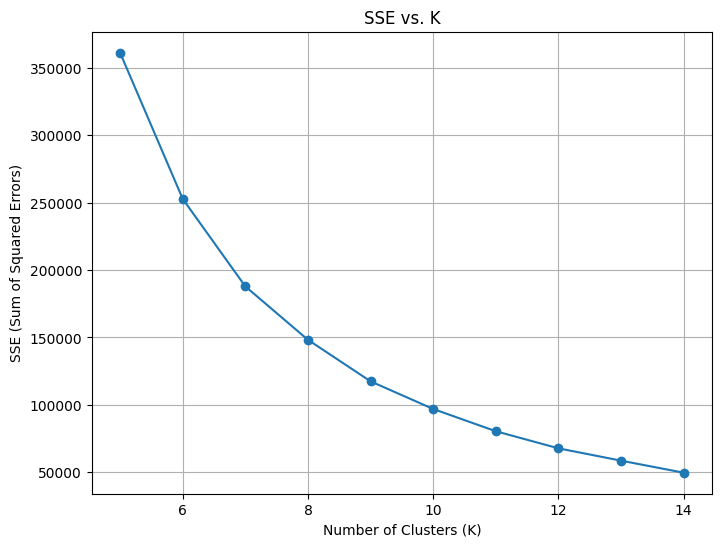

In [8]:
#Visualizing the ELBOW method to get the optimal value of K 
import matplotlib.pyplot as plt #Data Visualization 
# the elbow method is used to determine what is an optimal k 
SSE = [] # array for summ of seqaured error
K_range = range(5, 15)  #number of clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_) #

# Plot SSE vs. K
plt.figure(figsize=(8, 6))
plt.plot(K_range, SSE, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('SSE vs. K')
plt.grid(True)
plt.show()

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Silhouette Score: 0.5353597422250955


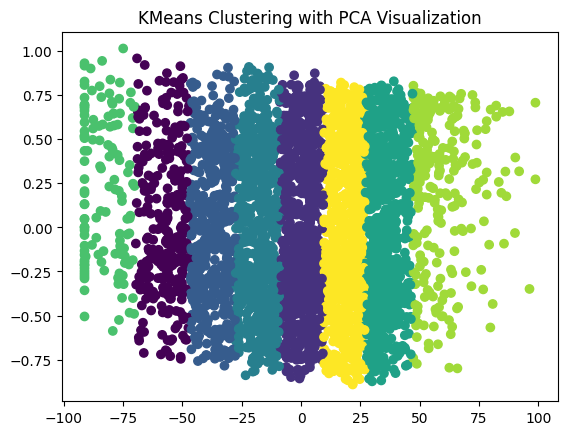

In [14]:
class KMeansClustering:
    def __init__(self,k=10):
        self.k = k
        self.centriods = None


    @staticmethod
    def euclidean_distance(data_point, centroids):
        
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
 # funtion to calculate the euclidean distancce betweeen centriods andn all pionts
    
    def fit(self, X, max_iterations=200):
        #uniform so it goes for every dimension
        #min max make sure that the random centriods are picked with the ranges of the data (it does not choose a point that does not exist)
        self.centriods = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), 
                                           size=(self.k, X.shape[1])) #X.shape[1] is the shape of the centriod
        for _ in range(max_iterations):
            y = [] # cluster labels (for everypoint in x)

            for data_point in X: # calcuulate euclidean distance
                
                distances = KMeansClustering.euclidean_distance(data_point, self.centriods) # calcuulate euclidean distance
                cluster_num = np.argmin(distances) # return the index of data point that has the min distance (centriod)
                y.append(cluster_num) # assign the the point to cluster num

            y = np.array(y)

            #next is re-adjusting the centriods

            cluster_indices = [] #list of list, for each clsuter, what data points belong to that cluster?? some moght be empty

            for i in range(self.k): 
                cluster_indices.append(np.argwhere(y==i)) # which indices belongs to each cluster

            cluster_centers = [] #for new centriods

            for i, indices in enumerate (cluster_indices): 
                if len(indices) == 0: # if length of indices is zero, (empty cluster indeces)
                    cluster_centers.append(self.centriods[i]) # if thee clsuter is empty keep the same centriod (nothing changes)
                else: 
                    cluster_centers.append(np.mean(X[indices], axis=0)[0]) #calculate the mean of the clsuter and make it the new centriod

            
            if np.max(self.centriods - np.array(cluster_centers)) == 0:
                break
            else:
                self.centriods = np.array(cluster_centers)

        return y
    
df = pd.read_csv(r'C:\Users\yolos\Downloads\GradProject2 - Copy (2)\RecommendationSystem\final_cut.csv')


feature_columns = [
    'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'speechiness',  'valence', 'tempo'
]

# Create a new DataFrame 'X' containing only the selected features
X = df[feature_columns].copy()


kmeans = KMeansClustering(k=10)
labels = kmeans.fit(X.values)



pca = PCA(n_components=4)  # You can choose the number of components
X_pca = pca.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeansClustering(k=8)
labels = kmeans.fit(X.values)

# Visualize the clusters in the PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering with PCA Visualization')
plt.xlabel('')
plt.ylabel('')
plt.show
            

from sklearn.metrics import silhouette_score
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

      

In [15]:
df['cluster_label'] = labels

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,track_name,artist_name,cluster_label
0,2,2,5,0.043567,0.745566,0.701470,0.000697,0.350000,0.124595,100.260,0.621661,This World,AWOL,7
1,3,3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Freeway,Kurt Vile,7
2,4,4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Street Music,AWOL,1
3,5,5,139,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,0.160267,CandyAss,Alec K. Redfearn & the Eyesores,5
4,6,6,140,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991,Queen Of The Wires,Alec K. Redfearn & the Eyesores,7


In [17]:
df.to_csv("D_Clustered.csv")